In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score, roc_auc_score, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


In [2]:
# Load the dataset
file_path = '/content/drive/MyDrive/data set/csv_result-KDDTrain+.csv'
df = pd.read_csv(file_path)

# Step 1: Handle target class by converting "anomaly" to 1 and "normal" to 0
df['\'class\''] = df['\'class\''].apply(lambda x: 1 if x.strip() == 'anomaly' else 0)

# Step 2: One-hot encode categorical columns
categorical_columns = ['\'protocol_type\'', '\'service\'', '\'flag\'']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Step 3: Standardize numerical columns (except the target 'class' column)
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop(['id', '\'class\''])

scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Step 4: Split dataset into features (X) and target (y)
X = df_encoded.drop(columns=['id', '\'class\''])
y = df_encoded['\'class\'']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Logistic Regression
print("Training Logistic Regression...")
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Calculate metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
auc_logistic = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Print results
print(f"Logistic Regression Performance:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"F1 Score: {f1_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"AUC: {auc_logistic:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_logistic)}\n")


Training Logistic Regression...
Logistic Regression Performance:
Accuracy: 0.9716
F1 Score: 0.9695
Precision: 0.9773
Recall: 0.9617
AUC: 0.9963
Confusion Matrix:
[[19688   395]
 [  678 17031]]



In [4]:
# Decision Tree
print("Training Decision Tree...")
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Calculate metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
auc_tree = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Print results
print(f"Decision Tree Performance:")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"F1 Score: {f1_tree:.4f}")
print(f"Precision: {precision_tree:.4f}")
print(f"Recall: {recall_tree:.4f}")
print(f"AUC: {auc_tree:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_tree)}\n")


Training Decision Tree...
Decision Tree Performance:
Accuracy: 0.9985
F1 Score: 0.9984
Precision: 0.9988
Recall: 0.9981
AUC: 0.9985
Confusion Matrix:
[[20062    21]
 [   34 17675]]



In [5]:
# Random Forest
print("Training Random Forest...")
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Print results
print(f"Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"AUC: {auc_rf:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}\n")


Training Random Forest...
Random Forest Performance:
Accuracy: 0.9989
F1 Score: 0.9988
Precision: 0.9995
Recall: 0.9981
AUC: 1.0000
Confusion Matrix:
[[20074     9]
 [   33 17676]]



In [6]:
# K-Nearest Neighbors
print("Training K-Nearest Neighbors (KNN)...")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

# Print results
print(f"K-Nearest Neighbors (KNN) Performance:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"AUC: {auc_knn:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}\n")


Training K-Nearest Neighbors (KNN)...
K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.9959
F1 Score: 0.9956
Precision: 0.9962
Recall: 0.9951
AUC: 0.9994
Confusion Matrix:
[[20015    68]
 [   87 17622]]



In [7]:
# Support Vector Machine (SVM)
print("Training Support Vector Machine (SVM)...")
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

# Print results
print(f"Support Vector Machine (SVM) Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"AUC: {auc_svm:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}\n")


Training Support Vector Machine (SVM)...
Support Vector Machine (SVM) Performance:
Accuracy: 0.9923
F1 Score: 0.9918
Precision: 0.9903
Recall: 0.9932
AUC: 0.9991
Confusion Matrix:
[[19911   172]
 [  120 17589]]



In [8]:
# Naive Bayes
print("Training Naive Bayes...")
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)

# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
auc_nb = roc_auc_score(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Print results
print(f"Naive Bayes Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"AUC: {auc_nb:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_nb)}\n")


Training Naive Bayes...
Naive Bayes Performance:
Accuracy: 0.8656
F1 Score: 0.8332
Precision: 0.9958
Recall: 0.7163
AUC: 0.9806
Confusion Matrix:
[[20029    54]
 [ 5024 12685]]



In [9]:
# XGBoost
print("Training XGBoost...")
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, xgboost_model.predict_proba(X_test)[:, 1])

# Print results
print(f"XGBoost Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"AUC: {auc_xgb:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_xgb)}\n")


Training XGBoost...
XGBoost Performance:
Accuracy: 0.9992
F1 Score: 0.9991
Precision: 0.9994
Recall: 0.9989
AUC: 1.0000
Confusion Matrix:
[[20072    11]
 [   20 17689]]



In [10]:
# Create a list to store the results
results_list = []

# Append results of each model to the list
results_list.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_logistic,
    'F1 Score': f1_logistic,
    'Precision': precision_logistic,
    'Recall': recall_logistic,
    'AUC': auc_logistic
})

results_list.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_tree,
    'F1 Score': f1_tree,
    'Precision': precision_tree,
    'Recall': recall_tree,
    'AUC': auc_tree
})

results_list.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_rf,
    'F1 Score': f1_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'AUC': auc_rf
})

results_list.append({
    'Model': 'K-Nearest Neighbors (KNN)',
    'Accuracy': accuracy_knn,
    'F1 Score': f1_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'AUC': auc_knn
})

results_list.append({
    'Model': 'Support Vector Machine (SVM)',
    'Accuracy': accuracy_svm,
    'F1 Score': f1_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'AUC': auc_svm
})

results_list.append({
    'Model': 'Naive Bayes',
    'Accuracy': accuracy_nb,
    'F1 Score': f1_nb,
    'Precision': precision_nb,
    'Recall': recall_nb,
    'AUC': auc_nb
})

results_list.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'F1 Score': f1_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'AUC': auc_xgb
})

# Create a DataFrame from the results
results_df = pd.DataFrame(results_list)

# Display the results
print("Model Performance Results:")
print(results_df)


Model Performance Results:
                          Model  Accuracy  F1 Score  Precision    Recall  \
0           Logistic Regression  0.971608  0.969461   0.977333  0.961714   
1                 Decision Tree  0.998545  0.998447   0.998813  0.998080   
2                 Random Forest  0.998889  0.998813   0.999491  0.998137   
3     K-Nearest Neighbors (KNN)  0.995899  0.995621   0.996156  0.995087   
4  Support Vector Machine (SVM)  0.992273  0.991768   0.990316  0.993224   
5                   Naive Bayes  0.865633  0.833224   0.995761  0.716302   
6                       XGBoost  0.999180  0.999125   0.999379  0.998871   

        AUC  
0  0.996316  
1  0.998517  
2  0.999990  
3  0.999403  
4  0.999107  
5  0.980592  
6  0.999992  


In [17]:
# Define weights for each metric
weights = {
    'Accuracy': 0.25,
    'F1 Score': 0.25,
    'Precision': 0.2,
    'Recall': 0.2,
    'AUC': 0.1
}

# Calculate aggregate score
results_df['Aggregate Score'] = (
    results_df['Accuracy'] * weights['Accuracy'] +
    results_df['F1 Score'] * weights['F1 Score'] +
    results_df['Precision'] * weights['Precision'] +
    results_df['Recall'] * weights['Recall'] +
    results_df['AUC'] * weights['AUC']
)

# Sort by Aggregate Score
results_df_sorted = results_df.sort_values(by='Aggregate Score', ascending=False)

# Display the sorted results
print("Model Performance Comparison (Sorted by Aggregate Score):")
print(results_df_sorted[['Model', 'Aggregate Score']])


Model Performance Comparison (Sorted by Aggregate Score):
                          Model  Aggregate Score
6                       XGBoost         0.999225
2                 Random Forest         0.998950
1                 Decision Tree         0.998478
3     K-Nearest Neighbors (KNN)         0.996069
4  Support Vector Machine (SVM)         0.992629
0           Logistic Regression         0.972708
5                   Naive Bayes         0.865186


<ipython-input-16-44b22dd0d733>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='viridis')


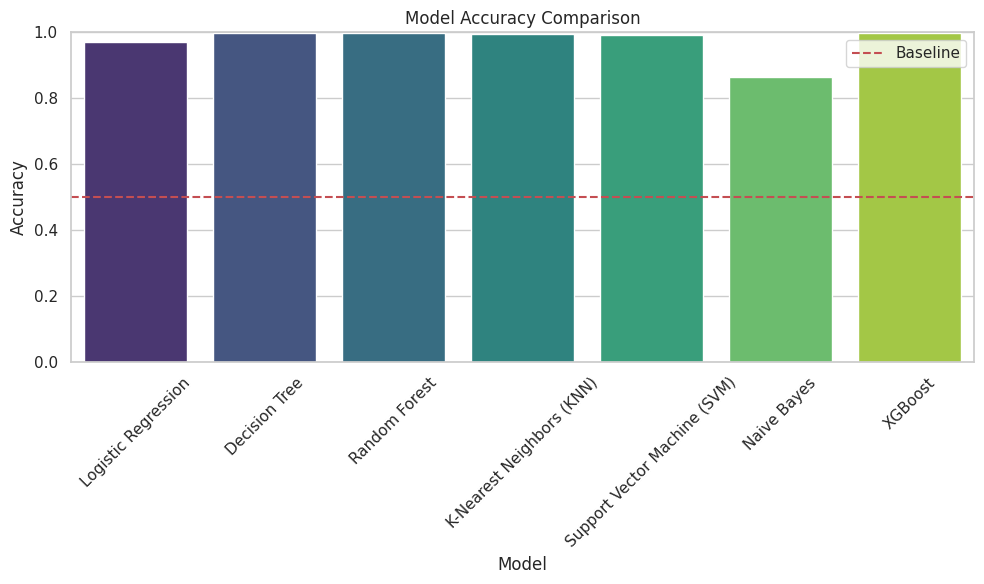

<ipython-input-16-44b22dd0d733>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='viridis')


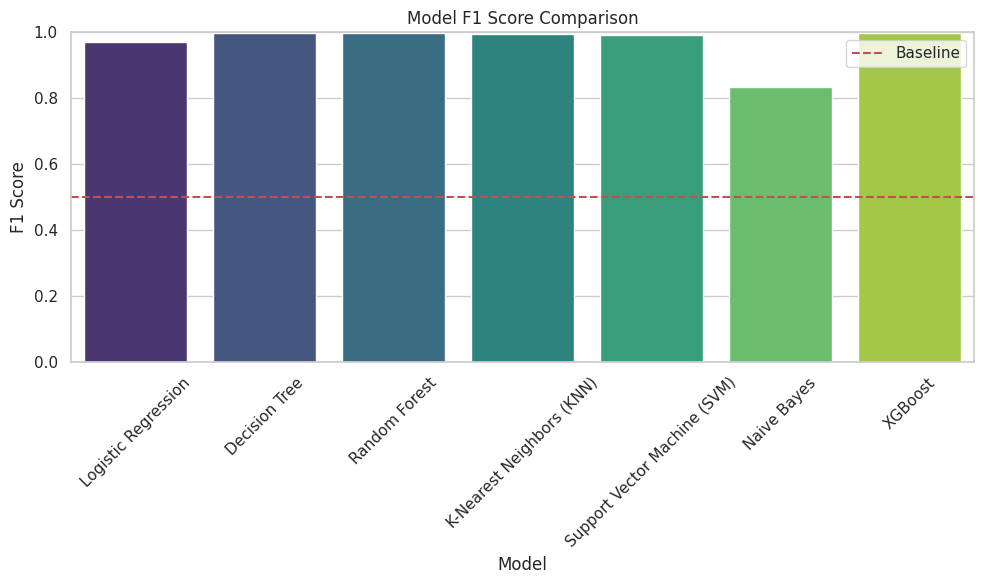

<ipython-input-16-44b22dd0d733>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='viridis')


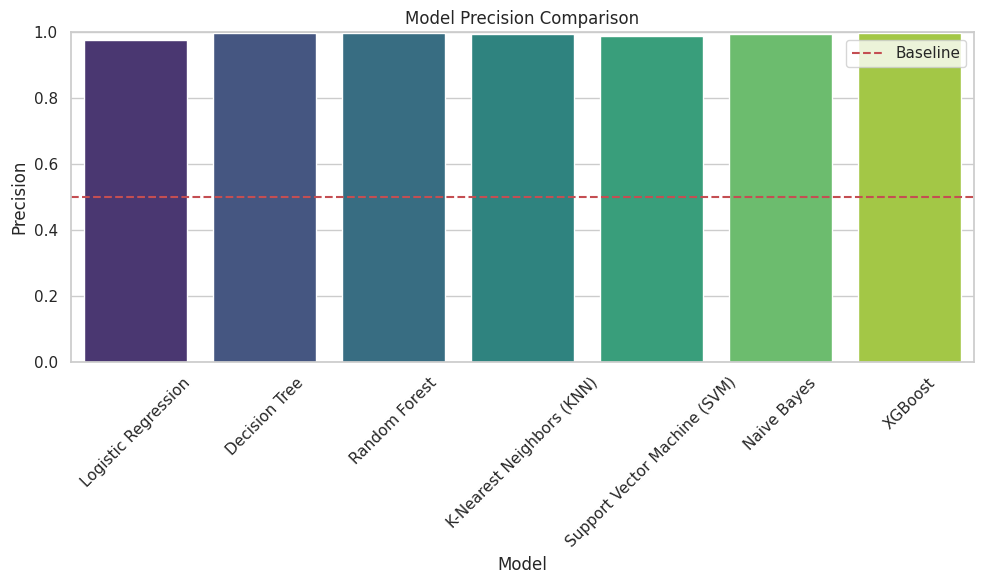

<ipython-input-16-44b22dd0d733>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='viridis')


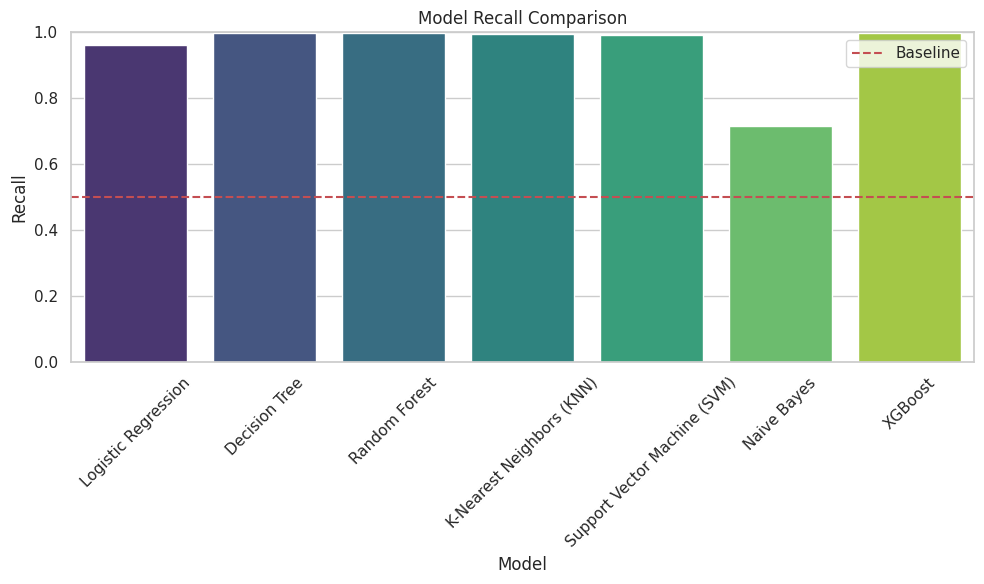

<ipython-input-16-44b22dd0d733>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='viridis')


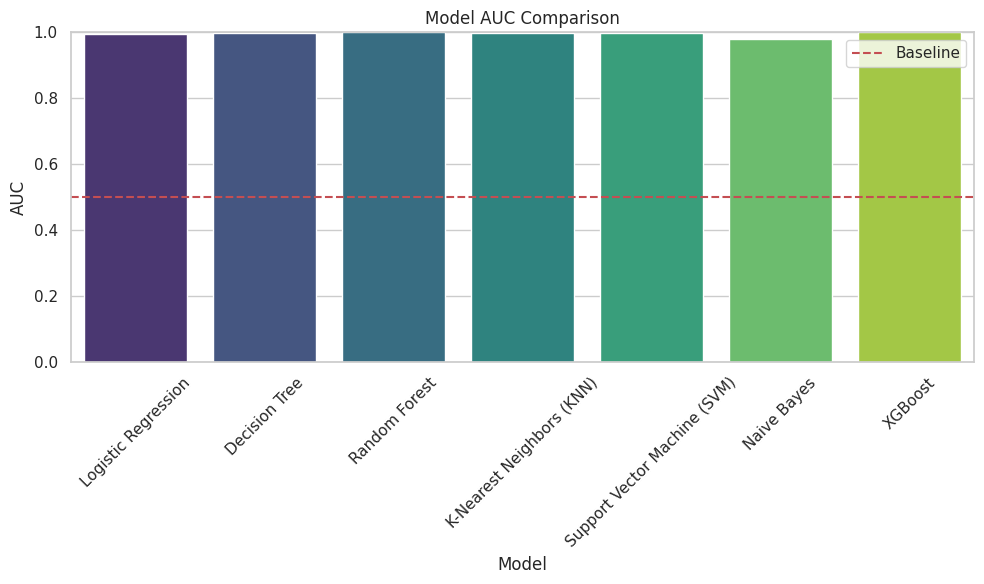

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Function to plot metrics
def plot_metrics(df, metric, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=df, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.ylim(0, 1)
    plt.axhline(0.5, color='r', linestyle='--', label='Baseline')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot Accuracy
plot_metrics(results_df, 'Accuracy', 'Model Accuracy Comparison')

# Plot F1 Score
plot_metrics(results_df, 'F1 Score', 'Model F1 Score Comparison')

# Plot Precision
plot_metrics(results_df, 'Precision', 'Model Precision Comparison')

# Plot Recall
plot_metrics(results_df, 'Recall', 'Model Recall Comparison')

# Plot AUC
plot_metrics(results_df, 'AUC', 'Model AUC Comparison')
